In [37]:
import torchvision.models as models

# try to use densenet with 161 layers or resnet with 18 layers to classify images
densenet = models.densenet161(pretrained=True)  
resnet18 = models.resnet18(pretrained=True)
vgg16 = models.vgg16(pretrained=True)

(1366, 768)
RGB


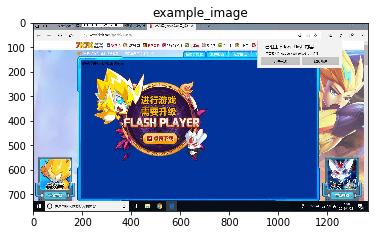

In [54]:
# a example of dataset
from PIL import Image
import matplotlib.pyplot as plt

example_image = '4classes/train/game/20190123140027.jpg'
img = Image.open(example_image)
print(img.size)
print(img.mode)

%matplotlib inline 
plt.imshow(img)
plt.axis('on')
plt.title('example_image')
plt.show()

In [22]:
# dataset preprocessing
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root='4classes/train', transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

In [21]:
# hyperparameters
num_epochs = 10
learning_rate = 0.001

In [40]:
# count parameters
params = list(resnet18.parameters())
params_count = 0

for i in range(len(params)):
    params_temp = 1
    for size in params[i].size():
        params_temp *= size
    
    params_count += params_temp

print('params_count: ', params_count)

params_count:  11689512


In [45]:
# define loss and optimizer
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr = learning_rate)

In [46]:
# GPU configuration
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

In [50]:
# train the model
resnet18 = resnet18.to(device)
total_step = len(dataset_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataset_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print("Epoch [{}/{}], Step[{}/{}]: {:.4f}".format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10], Step[100/497]: 0.0352
Epoch [1/10], Step[200/497]: 1.3276
Epoch [1/10], Step[300/497]: 0.0208
Epoch [1/10], Step[400/497]: 0.0614
Epoch [2/10], Step[100/497]: 0.1171
Epoch [2/10], Step[200/497]: 0.0316
Epoch [2/10], Step[300/497]: 0.0739
Epoch [2/10], Step[400/497]: 0.0038
Epoch [3/10], Step[100/497]: 0.7879
Epoch [3/10], Step[200/497]: 0.0043
Epoch [3/10], Step[300/497]: 0.8387
Epoch [3/10], Step[400/497]: 0.1395
Epoch [4/10], Step[100/497]: 0.0479
Epoch [4/10], Step[200/497]: 0.0220
Epoch [4/10], Step[300/497]: 0.2981
Epoch [4/10], Step[400/497]: 0.0507
Epoch [5/10], Step[100/497]: 0.1233
Epoch [5/10], Step[200/497]: 0.1639
Epoch [5/10], Step[300/497]: 0.1820
Epoch [5/10], Step[400/497]: 0.0379
Epoch [6/10], Step[100/497]: 0.0129
Epoch [6/10], Step[200/497]: 0.0088
Epoch [6/10], Step[300/497]: 0.0340
Epoch [6/10], Step[400/497]: 0.8985
Epoch [7/10], Step[100/497]: 0.0615
Epoch [7/10], Step[200/497]: 0.0743
Epoch [7/10], Step[300/497]: 0.0295
Epoch [7/10], Step[400/497]:

In [51]:
# save the model checkpoint
torch.save(resnet18.state_dict(), 'resnet18.ckpt')

In [53]:
# test the model based on training set
resnet18.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataset_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  
    print('Accuracy: {}/{} = {} %'.format(correct, total, 100 * correct / total))

Accuracy: 1959/1988 = 98.54124748490946 %


In [56]:
# test the model based on test set

testset = datasets.ImageFolder(root='4classes/test', transform=transform)
testset_loader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

resnet18.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testset_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  
    print('Accuracy: {}/{} = {} %'.format(correct, total, 100 * correct / total))

Accuracy: 395/400 = 98.75 %
